In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from skimage import transform,data
import imageio
from collections import Counter

In [5]:
def load_dataset():
    train_dataset = h5py.File('/home/li/Practive/DL_HomeWork/course1_week2/datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('/home/li/Practive/DL_HomeWork/course1_week2/datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [7]:
train_set_x_orig , train_set_y , test_set_x_orig , test_set_y , classes = load_dataset()

In [20]:
print(Counter(train_set_y[0]))
print(Counter(test_set_y[0]))

Counter({0: 137, 1: 72})
Counter({1: 33, 0: 17})


In [2]:
import os
import numpy as np
import h5py

def get_files(file_dir):
    Dog = []
    label_Dog = []
    NotDog = []
    label_NotDog = []
    for file in os.listdir(file_dir+'/W'):
        Dog.append(file_dir+'/W'+'/'+file)
        label_Dog.append(1)
    for file in os.listdir(file_dir+'/NW'):
        NotDog.append(file_dir+'/NW'+'/'+file)
        label_NotDog.append(0)
    #合并数据集
    image_list=np.hstack((Dog,NotDog))
    label_list=np.hstack((label_Dog,label_NotDog))
    #打乱图片顺序
    temp=np.array([image_list,label_list])
    temp=temp.transpose()
    np.random.shuffle(temp)
    #取出
    image_list=list(temp[:,0])
    label_list=list(temp[:,1])
    label_list=[int(i) for i in label_list]
    return image_list,label_list

In [3]:
image_list,label_list=get_files("./images")

In [4]:
print(image_list)

['./images/W/17.jpg', './images/NW/图片_102.jpg', './images/W/西瓜_806.jpg', './images/W/西瓜_857.jpg', './images/W/37.jpg', './images/W/16.jpg', './images/NW/图片_144.jpg', './images/W/12.jpg', './images/W/西瓜_853.jpg', './images/W/西瓜_436.jpg', './images/W/西瓜_2.jpg', './images/NW/图片_228.jpg', './images/NW/图片_183.jpg', './images/W/15.jpg', './images/W/66.jpeg', './images/NW/图片_46.jpg', './images/W/西瓜_26.jpg', './images/NW/图片_60.jpg', './images/W/西瓜_428.jpg', './images/W/38.jpg', './images/W/39.jpg', './images/NW/图片_56.jpg', './images/W/27.jpg', './images/NW/图片_254.jpg', './images/W/西瓜_62.jpg', './images/NW/图片_30.jpg', './images/W/西瓜_359.jpg', './images/W/1.jpg', './images/NW/图片_211.jpg', './images/NW/图片_47.jpg', './images/W/48.jpeg', './images/W/西瓜_442.jpg', './images/NW/图片_184.jpg', './images/W/西瓜_529.jpg', './images/W/26.jpg', './images/W/西瓜_307.jpg', './images/NW/图片_221.jpg', './images/W/64.jpeg', './images/W/西瓜_93.jpg', './images/W/35.jpg', './images/NW/图片_142.jpg', './images/W/29.jpg', './

In [5]:
Train_image=np.random.rand(len(image_list)-68,64,64,3).astype('float32')
Train_label=np.random.rand(len(image_list)-68,1).astype('float32')
Test_image=np.random.rand(68,64,64,3).astype('float32')
Test_label=np.random.rand(68,1).astype('float32')

In [6]:
sum=1
for i in range(len(image_list)-68):
    #print(i)
    temp_image= np.array(imageio.imread(image_list[i]))
    #print(temp_image.shape,temp_image.ndim)
    if  temp_image.ndim==3:
        if temp_image.shape[2]!=4:
            Train_image[i]=transform.resize(temp_image,(64,64))
            Train_label[i] = np.array(label_list[i])
            sum+=1
print("+++++++++++++++++++++++++++")
print(sum)
for i in range(len(image_list)-68, len(image_list)):
    #print(i)
    temp_image=np.array(imageio.imread(image_list[i+68-len(image_list)] ))
    #print(temp_image.shape)
    if temp_image.ndim==3:
        if temp_image.shape[2]!=4:
            Test_image[i+68-len(image_list)]=transform.resize(temp_image,(64,64))
            Test_label[i+68-len(image_list)] = np.array(label_list[i])
            sum+=1
print("+++++++++++++++++++++++++++")
print(sum)

+++++++++++++++++++++++++++
200
+++++++++++++++++++++++++++
268


In [7]:
f=h5py.File('Train_Set_W_1.h5','w')
f.create_dataset('train_set_x',data=Train_image)
f.create_dataset('train_set_y',data=Train_label)

<HDF5 dataset "train_set_y": shape (199, 1), type "<f4">

In [8]:
f=h5py.File('Test_Set_W_1.h5','w')
f.create_dataset('test_set_x',data=Test_image)
f.create_dataset('test_set_y',data=Test_label)

<HDF5 dataset "test_set_y": shape (68, 1), type "<f4">

(199, 64, 64, 3)
[1.]


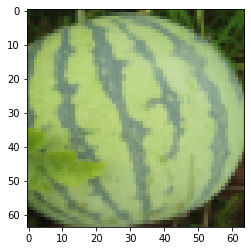

In [12]:
Train_dataset=h5py.File('Train_Set_W_1.h5','r')
T_X=np.array(Train_dataset['train_set_x'][:])
T_y=np.array(Train_dataset['train_set_y'][:])
print(T_X.shape)
index=110
print(T_y[index])
plt.imshow(T_X[index])
#plt.savefig('fig_dog.png')
#imageio.imwrite('test.jpg',T_X[18])
#print(T_X.ndim)

In [69]:
#for i in range(len(Train_dataset["train_set_x"])):
#    imageio.imwrite('/home/li/images/DOG_LOOK/{}.jpg'.format(i),T_X[i])

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

In [31]:
import imageio

In [32]:
import h5py
import numpy as np
from scipy.misc import imsave
from skimage import transform
import imageio

train_dataset = h5py.File(
    '/home/li/Practive/DL_HomeWork/course1_week4/C4W1/datasets/train_catvnoncat.h5', "r")

In [38]:
print(len(train_dataset["train_set_x"]))
train_set_x_orig = np.array(train_dataset["train_set_x"][:])
train_set_y_orig = np.array(train_dataset["train_set_y"][:])

209


In [87]:
def predict(X, y, parameters):
    """
    该函数用于预测L层神经网络的结果，当然也包含两层

    参数：
     X - 测试集
     y - 标签
     parameters - 训练模型的参数

    返回：
     p - 给定数据集X的预测
    """

    m = X.shape[1]
    n = len(parameters) // 2  # 神经网络的层数
    p = np.zeros((1, m))

    # 根据参数前向传播
    probas, caches = L_model_forward(X, parameters)
    print(type(probas))
    print(probas.shape)
    for i in range(0, probas.shape[1]):
        if probas[0][i] > 0.5:
            p[0][i] = 1
        else:
            p[0][i] = 0

    print("准确度为: " + str(float(np.sum((p == y))/m)))
    return p

In [43]:
for i in range(len(train_dataset["train_set_x"])):
    imageio.imwrite('/home/li/images/CAT_LOOK/{}.jpg'.format(i),train_set_x_orig[i])

In [77]:
b=np.random.rand(2,10)
print(b[0,3])
print(b[0][3])

0.7057808137095358
0.7057808137095358


In [85]:
a=np.array([[1,2,3,4],[4,3,2,1]])
b=np.array([[1,2,2,2],[3,4,2,1]])

In [86]:
np.sum((a==b))

4